In [346]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #for formatting while plotting mosquito number vs. date
from matplotlib.lines import Line2D #for customizing legend in our boxplot in Part 3, question 2
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
import statsmodels.api as sm
import os #for setting directory

In [347]:
plt.rcParams["figure.figsize"] = (8.0, 6.0) #set figure size throughout notebook

In [348]:
os.chdir("C:/Users/emshe/Desktop/BRAINSTATION/PYTHON_MATERIALS/TEST_DATA") #set directory
mosquito_df = pd.read_csv("mosquito_data.csv") #read csv file

In [349]:
display(mosquito_df.sample(10)) #examine random sample of data for EDA

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
3950,2016,27,58XX N WESTERN AVE,58,T028B,SENTINEL,2016-07-08 00:07:00,13,Res,negative,CULEX RESTUANS,41.987470,-87.689423
114,2019,37,70XX W ARMITAGE AVE,70,T151,GRAVID,2019-09-12 00:09:00,8,Res,positive,CULEX RESTUANS,41.916135,-87.801093
7035,2013,36,109XX S COTTAGE GROVE AVE,109,T102,GRAVID,2013-09-06 00:09:00,6,Pip,negative,CULEX PIPIENS,41.695494,-87.609082
13269,2008,30,100XX W OHARE AIRPORT,100,T906,GRAVID,2008-07-29 00:07:00,1,Sal,negative,CULEX SALINARIUS,NaN,NaN
2543,2017,32,45XX N CAMPBELL AVE,45,T220,GRAVID,2017-08-10 00:08:00,2,Res,negative,CULEX RESTUANS,41.964405,-87.691370
5812,2014,34,22XX N CANNON DR,22,T054A,GRAVID,2014-08-21 00:08:00,1,Res,negative,CULEX RESTUANS,41.922737,-87.632450
1977,2018,25,52XX S KOLMAR AVE,52,T114,GRAVID,2018-06-21 00:06:00,31,Res,negative,CULEX RESTUANS,41.798211,-87.736925
15214,2007,28,101XX S STONY ISLAND AVE,101,T138,CDC,2007-07-18 00:07:00,26,Res,negative,CULEX RESTUANS,41.710542,-87.584559
5042,2015,24,52XX S KOLMAR AVE,52,T114,GRAVID,2015-06-18 00:06:00,5,Res,negative,CULEX RESTUANS,41.798211,-87.736925
13899,2007,37,131XX S TORRENCE AVE,131,T203,GRAVID,2007-09-19 00:09:00,11,Pip,negative,CULEX PIPIENS,41.656789,-87.559440


In [350]:
mosquito_df.info() #check data types for each column, check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [351]:
mosquito_df.describe() #check basic statistical data (such as count, mean, min, max) for numeric variables 

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


# Part 1 - Basic Data Wrangling

### 1. What is the shape of the data frame?

In [352]:
print(mosquito_df.shape)

(18495, 13)


The mosquito data frame has 13 columns (fields) and 18495 rows (records).

### 2. Convert the 'Date' column to have a datetime format. 

In [353]:
mosquito_df_uncleaned = mosquito_df.copy() #we copy the data frame before making changes, in case we later want to reference the original
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date']) #convert the 'Date' column to the datetime data type instead of the string data type

In [354]:
mosquito_df.info() #confirm the data type of the 'Date' column has been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


### 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

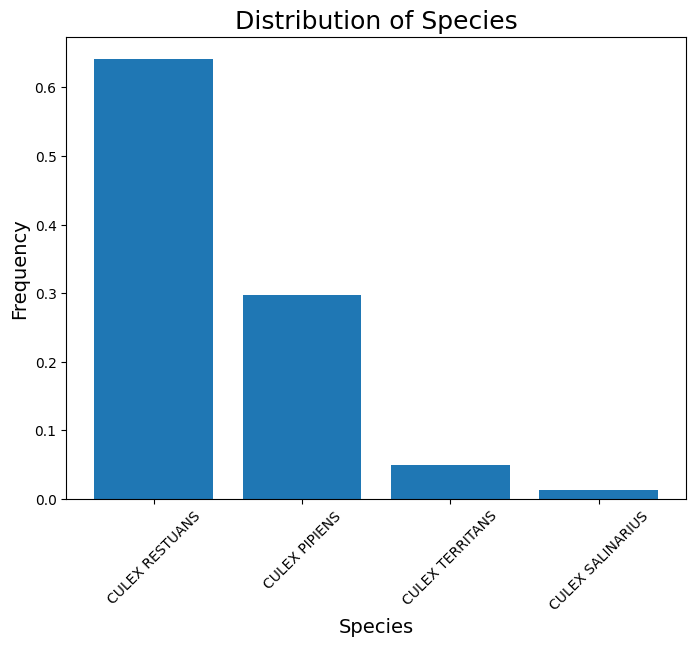

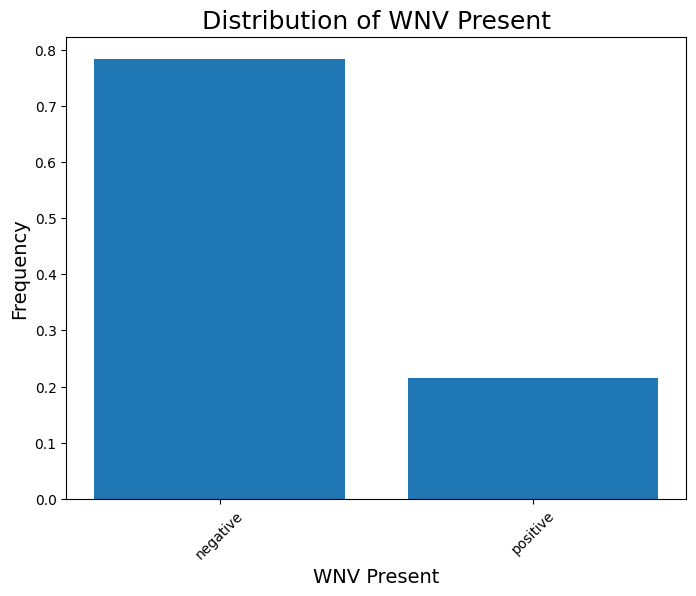

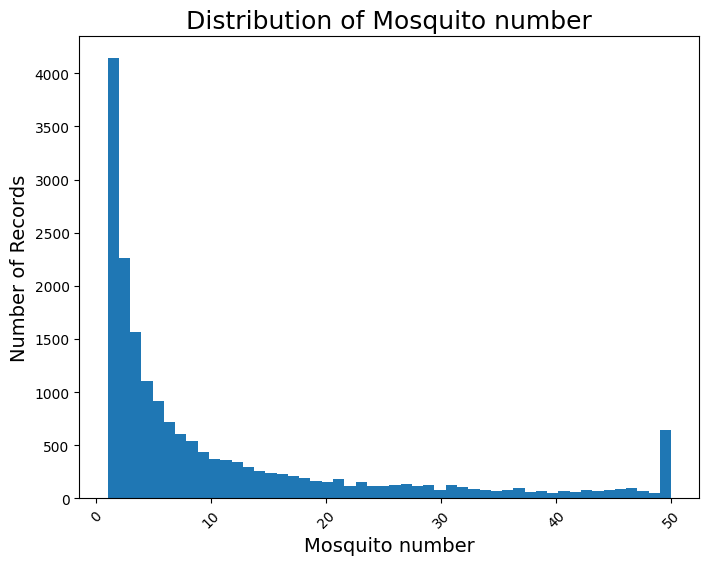

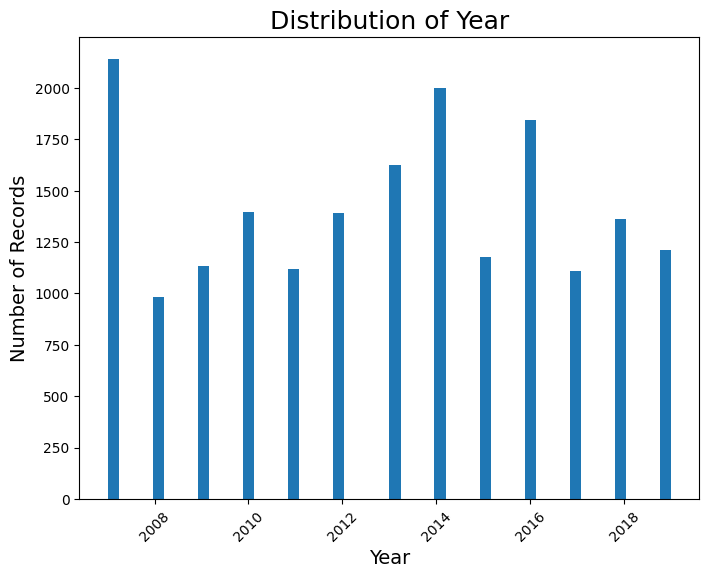

In [355]:
numeric_col = ['Mosquito number','Year']
categorical_col = ['Species', 'WNV Present']


for col in categorical_col:
    col_counts = mosquito_df[col].value_counts(normalize = True) #for each categorical column, determine normalized distribution of data 
    plt.bar(col_counts.index, col_counts.array) #plot distribution in a bar graph (normalization allows us to consider frequency relative to total)
    plt.title(f'Distribution of {col}',fontsize = 18)
    plt.xlabel(col, fontsize =  14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.xticks(rotation = 45) #rotate x-labels for readability
    plt.show()
    print('') #add empty line to space out visualizations for readability

for col in numeric_col:
    plt.hist(mosquito_df[col].values, bins = 50) #for each numeric column, plot distribution of number of interests in a histogram
    plt.title(f'Distribution of {col}',fontsize = 18)
    plt.xlabel(col, fontsize =  14)
    plt.ylabel('Number of Records', fontsize = 14) #for numeric data, the number of instances is useful (e.g. in a given year) so we don't normalize
    plt.xticks(rotation = 45)
    plt.show()
    print('')


For the categorical variables, we examined ‘Species’ and ‘WNV Present’. The 'Species' column stores the name of the mosquito species as a string for each test record. Plotting its normalized distribution, we find that Culex Restuans is the most prevalent species, accounting for approximately 65% of the dataset. This is followed by Culex Pipiens at around 30%, Culex Territans at 5%, and Culex Salinarius at just 1%. The 'WNV Present' column indicates whether the West Nile Virus was detected in a given test, recorded as the string "positive" or "negative." A bar graph of the normalized values shows that WNV was detected in roughly 21% of cases, with the remainder testing negative. We used normalized distributions for these columns to emphasize relative frequency over absolute counts, which is more informative when comparing across the dataset.

For the numeric columns, we looked at ‘Mosquito number’ and ‘Year’. The 'Mosquito' number column stores the integer count of mosquitos collected in each trap during testing. A histogram (with 50 bins) shows a right-skewed distribution, with the vast majority of values falling below 10. The frequency steadily decreases with higher counts, but there is a visible spike at 50, reflecting a data cap—counts above 50 are split into multiple records. The 'Year' column captures the year in which each test occurred as an integer. Its distribution is a bar chart, since only 13 distinct years are recorded. The highest number of tests took place in 2007 (over 2000 records), followed by 2014 and 2016. The fewest tests were recorded in 2008, marking a sharp drop after 2007. It is important to note that this visualization on its own only indicates testing patterns, not WNV prevalence, as we are counting both positive and negative tests. In the case of numeric variables, we focus on the number of records rather than the normalized distribution because it is useful to get a sense of how many tests were conducted in each year and how many mosquitos have been tested to contextualize the study.

### 4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [356]:
redundant_cols = ['Year','Week','Block', 'Mosquito ID']
mosquito_df.drop(columns = redundant_cols,inplace = True) #drop redundant columns from dataframe

In [357]:
mosquito_df.info() #confirm redundant columns have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Address Block    18495 non-null  object        
 1   Trap             18495 non-null  object        
 2   Trap type        18495 non-null  object        
 3   Date             18495 non-null  datetime64[ns]
 4   Mosquito number  18495 non-null  int64         
 5   WNV Present      18495 non-null  object        
 6   Species          18495 non-null  object        
 7   Lat              15571 non-null  float64       
 8   Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.3+ MB


We drop four columns that contain redundant information. The 'Year' and 'Week' column are not necessary as we already have exact dates in the 'Date' column. The 'Block' column contains data already implicit in the 'Address Block' column (the first integers in the address strings). Lastly, the 'Mosquito ID' contains ids for each mosquito species but offers no more information than the 'Species' column. In a different database or context, a mosquito species id column might be useful, for example, as a foreign key to connect to a table offering more info about the species. However, in our case, the data are simply shorthand strings for the mosquito species, and the column is not necessary.

### 5. Are there any null values in the dataframe? If so, deal with them appropriately.

In [358]:
display(mosquito_df.isna().sum()) #Count how many null values are in each column

Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

In [359]:
cols_with_null = ['Lat','Lon'] #'Lat' and 'Lon' are the two columns with null values (2924 each)
for col in cols_with_null:
    mosquito_df[col] = mosquito_df[col].fillna(mosquito_df[col].median()) #we replace all null values with the median for the given column
display(mosquito_df.isna().sum()) #we confirm there are now no null values
display(mosquito_df.describe()) #check how the statistical metrics for these columns have changed

Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

,Date,Mosquito number,Lat,Lon
count,18495,18495.000000,18495.000000,18495.000000
mean,2013-06-30 17:40:04.100135424,10.879913,41.840873,-87.691651
min,2007-05-29 00:05:00,1.000000,41.644720,-87.854473
25%,2010-07-16 00:07:00,2.000000,41.765753,-87.731579
50%,2013-08-22 00:08:00,5.000000,41.845715,-87.691698
75%,2016-08-11 00:08:00,14.000000,41.923887,-87.649722
max,2019-09-26 00:09:00,50.000000,42.017801,-87.531051
std,NaN,13.475066,0.102212,0.070234


To check for missing data, we used the isna() function and found that both the ‘Lat’ and ‘Lon’ columns contain 2,924 null values. To address this, we used the fillna() function to replace missing values with the median of each respective column. This approach preserves the data type and mean value, ensuring that all records retain numeric, non-null coordinates. However, this method may introduce inaccuracies in geographic analysis, as many coordinates are now placeholders rather than true locations. For instance, we observed changes in the standard deviation and quartiles for these columns after imputation. Ideally, missing latitude and longitude values could be recovered by converting the corresponding addresses to coordinates, but this is beyond the scope of our current project.

# Part 2 - Basic EDA

### 1. Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

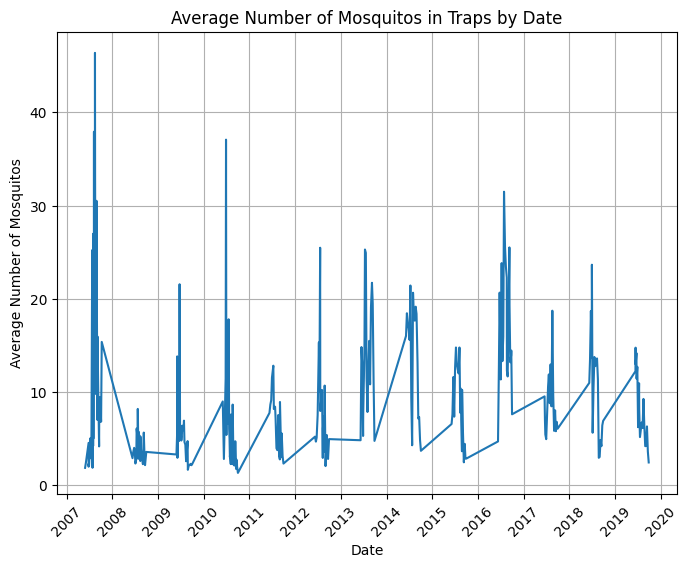

In [360]:
avg_by_date = mosquito_df.groupby('Date')['Mosquito number'].mean() #create data frame showing average mosquito count indexed by date

plt.plot(avg_by_date) #create line plot of average number of mosquitos by date
plt.title('Average Number of Mosquitos in Traps by Date')
plt.xlabel('Date')
plt.ylabel('Average Number of Mosquitos')
plt.xticks(rotation = 45) #tilt x-labels for readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) #ensure the x-axis includes every year for a more precise visualization
plt.grid() #include a grid for readability
plt.show()

Our first visualization is a line plot showing the average mosquito count per date over time. Line plots are typically useful for identifying trends and fluctuations in time series data. However, in this case, the plot reveals a notable irregularity: the dataset only contains observations from non-winter months (May through October). As a result, each year has large gaps, causing the line to spike periodically and making the overall trend difficult to interpret. While the plot does offer a general sense of which years had higher mosquito activity, the seasonal gaps reduce its clarity, and alternative visualizations are better suited to this dataset.

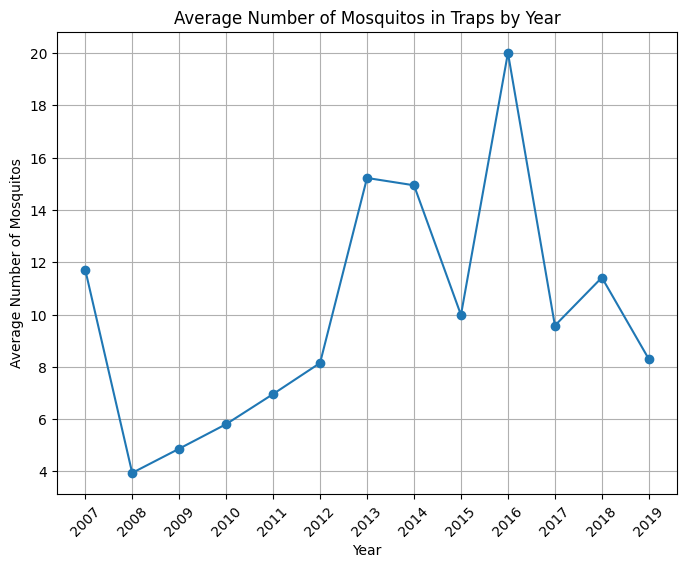

In [361]:
mosquito_df_year = mosquito_df.copy()[['Date','Mosquito number']] #initiate data frame with only the required columns
#above, we use a copy so that we do not run into any slicing issues
mosquito_df_year['Year'] = mosquito_df_year['Date'].dt.year #add column with year data
avg_by_year = mosquito_df_year.groupby('Year')['Mosquito number'].mean() #create data frame showing average mosquito count indexed by year

plt.plot(avg_by_year.index,avg_by_year.values, marker = 'o') #create line plot with markers for each year
plt.title('Average Number of Mosquitos in Traps by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Mosquitos')
plt.grid(True)
plt.xticks(ticks = avg_by_year.index, rotation = 45) #force every year to appear on x-axis, tilt x-labels for readability
plt.show()

We next generate a line plot showing how the average number of mosquitos in traps has varied from 2007 to 2019. This aggregated representation avoids the misleading gaps caused by missing months and makes year by year comparisons straightforward. The visualization reveals that 2007 had a high average mosquito count of approximately 11.7, followed by a sharp drop to 3.9 in 2008—the lowest in the dataset. The average then climbs relatively steadily before a sudden drop in 2015, followed by a peak in 2016 at the value 15.2. After 2016, the averages drops again and hovers around 10 in the subsequent years. This clearer view helps identify longer-term patterns in trapped mosquito numbers across years.

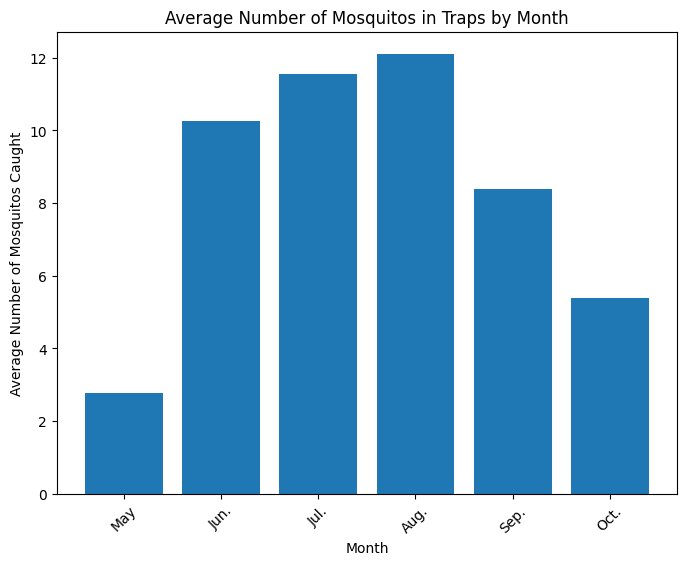

In [362]:
mosquito_df_month = mosquito_df.copy()[['Date','Mosquito number']] #initiate dataframe with only the required columns
#above, we use a copy so that we do not run into any slicing issues
mosquito_df_month['Month'] = mosquito_df_month['Date'].dt.month #add column with month data
avg_by_month = mosquito_df_month.groupby('Month')['Mosquito number'].mean() #create dataframe showing average mosquito count indexed by month

plt.bar(avg_by_month.index,avg_by_month.values) #create bar chart of average number of mosquitos by year
plt.title('Average Number of Mosquitos in Traps by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitos Caught')
plt.xticks(ticks=range(5, 11), labels=['May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.']) #replace numeric labels with month name abbreviations
plt.xticks(rotation = 45) #tilt x-labels for readability
plt.show()

After analyzing trends by year, we generate a bar graph to examine average mosquito counts by month, aggregated across all years. This visualization includes only the months with available data—May through October—and highlights seasonal variation in mosquito populations. The average begins at a low of about 2.8 in May, rises steadily through the summer, and peaks in August at approximately 12.1. The counts then decline in the fall, with averages of around 8.4 in September and 5.4 in October. This pattern aligns with common expectations of mosquito activity, which tends to increase in warmer months and taper off as temperatures drop.

# Part 3 - Advanced EDA

### 1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

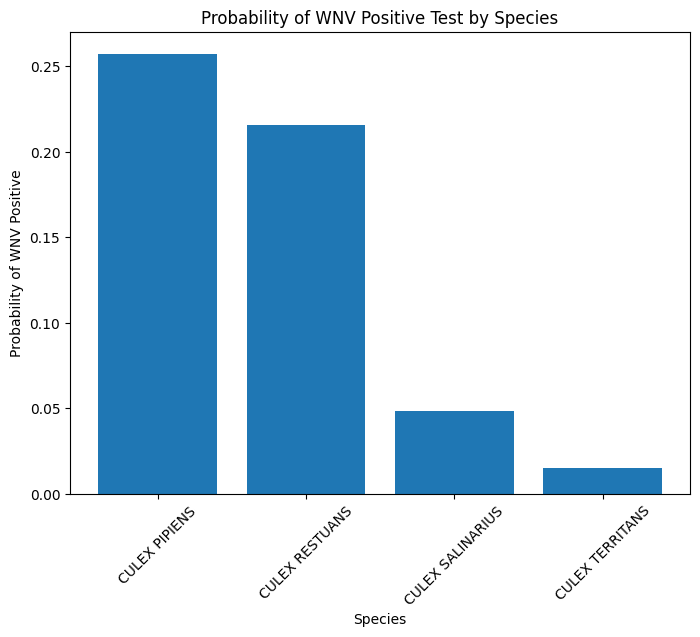

In [363]:
#replace 'positive' and 'negative' entries with 1 and 0 to facilitate probability calculations
mosquito_df['WNV Present'] = mosquito_df['WNV Present'].map({'positive': 1, 'negative': 0})

# group by species and calculate the mean of WNV Present (which gives us the probability)
prob_by_species = mosquito_df.groupby('Species')['WNV Present'].mean()

plt.bar(prob_by_species.index, prob_by_species.values) #plot as bar graph
plt.title('Probability of WNV Positive Test by Species')
plt.xlabel('Species')
plt.ylabel('Probability of WNV Positive')
plt.xticks(rotation=45)
plt.show()

The above bar chart displays the probability of a positive West Nile Virus test for each mosquito species in the dataset. The results show that Culex Pipiens has the highest probability of testing positive at approximately 25.7%, followed by Culex Restuans at around 21.5%. In contrast, Culex Salinarius and Culex Territans have much lower probabilities, at 4.9% and 1.5% respectively. This suggests that Culex Pipiens and Culex Restuans are more likely to carry WNV in this dataset, which aligns with their known roles as primary carriers of the virus. The stark contrast between these and the other species highlights potential differences in exposure risk.

### 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

In [364]:
print(mosquito_df['Trap type'].value_counts()) #check the value counts for all trap types
#we notice the 'OVI' trap type only appears once in the data set

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64


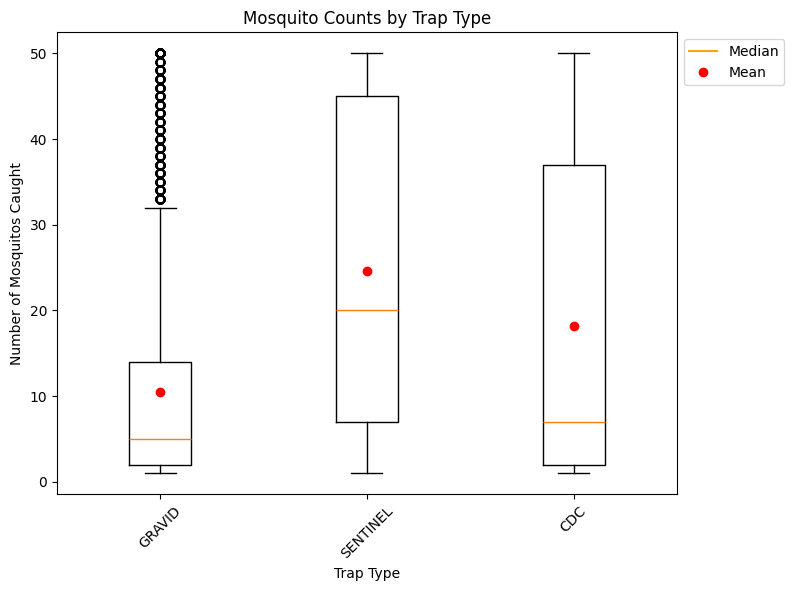

In [365]:
trap_types = mosquito_df['Trap type'].unique() #create array of the different trap types
trap_types = np.delete(trap_types, 3) #drop the 'OVI' trap type as we found there is only one record with that trap type
trap_type_data = [mosquito_df[mosquito_df['Trap type'] == trap]['Mosquito number'] for trap in trap_types]
#above, we create an array with the 'Mosquito number' data for each trap type

plt.boxplot(trap_type_data, tick_labels = trap_types) #create a boxplot
means = [group.mean() for group in trap_type_data] #find means for each trap type
plt.plot([1,2,3], means, color='red', marker='o', linestyle = 'None') #plot dots indicating the means for each trap type
plt.title('Mosquito Counts by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Number of Mosquitos Caught')
plt.xticks(rotation=45) #rotate x-axis labels for readability
median_line = Line2D([0], [0], color='orange', linestyle='-', label='Median') #create customized legend symbols for mean and median using Line2D
mean_dot = Line2D([0], [0], color='red', marker='o', linestyle='None', label='Mean')
plt.legend(handles=[median_line, mean_dot], loc = 'upper left', bbox_to_anchor=(1, 1)) #position legend so there is no overlap with the plot
plt.show()

Based on the above boxplot, which compares mosquito counts across different trap types, we observe clear differences in the distribution of mosquito numbers appearing in different types of traps. GRAVID traps tend to catch fewer mosquitoes on average, with a lower mean and median and a tighter interquartile range, although they exhibit a large number of outliers at the upper end, indicating occasional high counts. SENTINEL traps have the highest median and mean mosquito counts, suggesting they are generally more effective in capturing larger quantities. The spread for these traps is quite broad, with the interquartile range spanning from about 7 to 45 mosquitoes, reflecting high variability. CDC traps fall between the other two in terms of spread and central tendency, with a median closer to GRAVID but a higher mean, indicating that some high-count records might be pulling the average up. The addition of red dots marking the means highlights right-skewed distributions for all three traps types, since the means lies above the medians in every case (albeit to different degrees). Notably, we excluded OVI traps from this visualization because only a single record was available for that trap type. The reason we observe outliers only for GRAVID traps is that mosquito counts are capped at 50 and bounded below by 1. Thus, upper outliers appear only when the upper whisker (representing the upper limit of the non-outlier range) is below 50. This artificial cap can lead to misinterpretation of the data, especially in understanding the upper tail of the distributions, so it is essential that viewers of this plot are made aware of the 50 mosquito limit in the dataset.

### 3. Using an appropriate visual, come up with an additional insight of your choice.

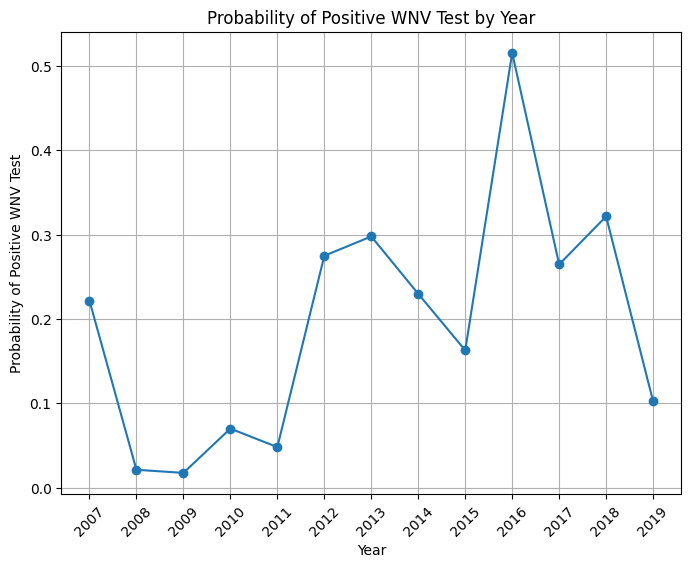

In [366]:
mosquito_df_year = mosquito_df.copy()[['Date','WNV Present']] #initiate data frame with only the required columns
#above, we use a copy so that we do not run into any slicing issues
mosquito_df_year['Year'] = mosquito_df_year['Date'].dt.year #add column with year data
# Calculate probability of positive WNV test by year
wnv_prob_by_year = mosquito_df_year.groupby('Year')['WNV Present'].mean()

plt.plot(wnv_prob_by_year.index, wnv_prob_by_year.values, marker='o') #plot line graph with markers for each year
plt.title('Probability of Positive WNV Test by Year')
plt.xlabel('Year')
plt.ylabel('Probability of Positive WNV Test')
plt.xticks(wnv_prob_by_year.index, rotation=45) #force every year to appear on x-axis, tilt x-labels for readability
plt.grid() #include grid for readability
plt.show() 

The line plot illustrates the yearly probability of a positive West Nile Virus (WNV) test between 2007 and 2019. In 2007, the positivity rate starts at approximately 22%, but it drops sharply in the following years, reaching its lowest values in 2008 (2.1%) and 2009 (1.8%). Between 2010 and 2011, the probability remains low, staying under 8%. A notable shift occurs in 2012, when the rate jumps to 27.5%, followed by a further increase to nearly 30% in 2013. This is followed by a slight decline through 2014 and 2015, with probabilities of 23% and 16%, respectively. The most significant spike appears in 2016, where over 51% of tests returned positive, marking the peak of the dataset. In subsequent years, the positivity rate declines again, dropping to around 26.5% in 2017, increasing slightly to about 32% in 2018, and then falling to 10% in 2019. Overall, the plot reveals substantial year-to-year variability in WNV test positivity, with significant highs in 2013, 2016, and 2018 and very low probabilities from 2008 to 2011.
This highlights the importance of time-specific monitoring in understanding and responding to the dynamics of WNV prevalence.